In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor

In [2]:
all_stats = pd.read_csv("all_stats.csv", index_col=0)

In [3]:
all_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,0.539,...,0.0,0.000,Los Angeles Lakers,62,20,0.756,0.0,117.3,109.5,6.84
1,Byron Scott,SG,24,LAL,76,62,28.8,6.7,13.0,0.513,...,0.0,0.000,Los Angeles Lakers,62,20,0.756,0.0,117.3,109.5,6.84
2,James Worthy,SF,24,LAL,75,73,32.7,8.4,14.5,0.579,...,780.0,0.009,Los Angeles Lakers,62,20,0.756,0.0,117.3,109.5,6.84
3,Jerome Henderson,C,26,LAL,1,0,3.0,2.0,3.0,0.667,...,0.0,0.000,Los Angeles Lakers,62,20,0.756,0.0,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38,LAL,79,79,33.3,9.6,16.9,0.564,...,780.0,0.173,Los Angeles Lakers,62,20,0.756,0.0,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16405,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0.0,0.000,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
16406,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.0,0.000,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
16407,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0.0,0.000,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
16408,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0.0,0.000,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [4]:
pd.isnull(all_stats).sum()   # checking number of null vaues in each column

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          63
3P            0
3PA           0
3P%        2376
2P            0
2PA           0
2P%         106
eFG%         63
FT            0
FTA           0
FT%         556
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [5]:
all_stats[pd.isnull(all_stats["3P%"])][["Player", "3PA"]].head()  # seein if values are missing or incalculable

,Player,3PA
3,Jerome Henderson,0.0
5,Kurt Rambis,0.0
12,Pétur Guðmundsson,0.0
20,Kurt Rambis,0.0
23,Mike Smrek,0.0


In [6]:
all_stats[pd.isnull(all_stats["FT%"])][["Player", "FTA"]].head() # seein if values are missing or incalculable

,Player,FTA
3,Jerome Henderson,0.0
144,John Coker,0.0
159,Jason Sasser,0.0
170,Adrian Caldwell,0.0
186,Bruno Šundov,0.0


In [7]:
all_stats = all_stats.fillna(0) # replacing all missing values with 0

In [8]:
all_stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [9]:
predictors = ['Age', 'MP', 'FG', 'FG%', '3P',
       '3P%', '2P', '2P%', 'eFG%', 'FT', 'FT%',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'Year',
       'W/L%', 'PS/G']
# feature/ independent variables       

In [10]:
train = all_stats[~(all_stats["Year"] < 2022)] # using all data prior to 2022 as training data
test = all_stats[all_stats["Year"] == 2022]    # using 2022 as test data

In [11]:
model = LinearRegression()
model.fit(train[predictors],train["Share"]) # fitting training data to the linear regression model  

LinearRegression()

In [12]:
predictions = model.predict(test[predictors]) # predicting share using test data
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index) # creating data frame with predictions

In [13]:
join = pd.concat([test[["Player", "Share"]], predictions], axis=1) #conctenating player column and actual share value to predictions data frame
join.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
730,Nikola Jokić,0.875,0.146428
904,Joel Embiid,0.706,0.194181
13036,Giannis Antetokounmpo,0.595,0.177405
974,Devin Booker,0.216,0.056188
12827,Luka Dončić,0.146,0.107239
1246,Jayson Tatum,0.043,0.077959
13648,Ja Morant,0.010,0.084792
6994,Stephen Curry,0.004,0.045426
972,Chris Paul,0.002,0.034633
8963,LeBron James,0.001,0.070934


In [14]:
join_plot = join.sort_values(["predictions"],ascending=False) 
join_plot.head(5) # sorting an identifying top 5 for predicted shares 

,Player,Share,predictions
904,Joel Embiid,0.706,0.194181
13036,Giannis Antetokounmpo,0.595,0.177405
730,Nikola Jokić,0.875,0.146428
903,James Harden,0.000,0.112598
12827,Luka Dončić,0.146,0.107239


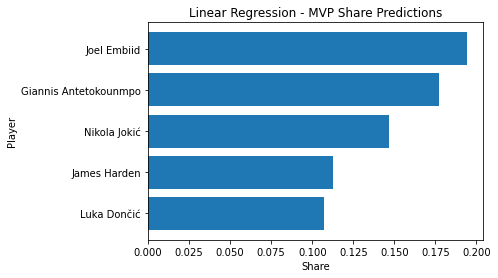

In [15]:
join_plot = join.sort_values(["predictions"],ascending=False)
plt.figure(1)
plt.barh(join_plot['Player'][0:5],join_plot['predictions'][0:5])
plt.gca().invert_yaxis()
plt.title("Linear Regression - MVP Share Predictions")
plt.xlabel("Share")
plt.ylabel("Player")
plt.show()

In [16]:
join = join.sort_values("Share", ascending=False) # sorting share highest to lowest
join["Rank"] = list(range(1,join.shape[0]+1)) # creating rank for share 
join.head(10)

,Player,Share,predictions,Rank
730,Nikola Jokić,0.875,0.146428,1
904,Joel Embiid,0.706,0.194181,2
13036,Giannis Antetokounmpo,0.595,0.177405,3
974,Devin Booker,0.216,0.056188,4
12827,Luka Dončić,0.146,0.107239,5
1246,Jayson Tatum,0.043,0.077959,6
13648,Ja Morant,0.010,0.084792,7
6994,Stephen Curry,0.004,0.045426,8
972,Chris Paul,0.002,0.034633,9
8963,LeBron James,0.001,0.070934,10


In [17]:
join = join.sort_values("predictions", ascending=False) # sorting predicted share highest to lowest
join["Predicted_Rank"] = list(range(1,join.shape[0]+1)) # creating rank for predicted share
join.head(10)

,Player,Share,predictions,Rank,Predicted_Rank
904,Joel Embiid,0.706,0.194181,2,1
13036,Giannis Antetokounmpo,0.595,0.177405,3,2
730,Nikola Jokić,0.875,0.146428,1,3
903,James Harden,0.000,0.112598,393,4
12827,Luka Dončić,0.146,0.107239,5,5
11358,Jimmy Butler,0.000,0.103403,51,6
6781,Kevin Durant,0.001,0.099054,12,7
13249,Rudy Gobert,0.000,0.096835,233,8
4223,DeMar DeRozan,0.001,0.087219,11,9
8998,Karl-Anthony Towns,0.000,0.086929,121,10


In [18]:
join.sort_values("Share", ascending=False).head(10)

,Player,Share,predictions,Rank,Predicted_Rank
730,Nikola Jokić,0.875,0.146428,1,3
904,Joel Embiid,0.706,0.194181,2,1
13036,Giannis Antetokounmpo,0.595,0.177405,3,2
974,Devin Booker,0.216,0.056188,4,27
12827,Luka Dončić,0.146,0.107239,5,5
1246,Jayson Tatum,0.043,0.077959,6,16
13648,Ja Morant,0.010,0.084792,7,11
6994,Stephen Curry,0.004,0.045426,8,33
972,Chris Paul,0.002,0.034633,9,48
4223,DeMar DeRozan,0.001,0.087219,11,9


In [19]:
def find_ap(join):
    actual = join.sort_values("Share", ascending=False).head(5) #sort data frame by share then take the top 5 MVP candidates
    predicted = join.sort_values("predictions", ascending=False) #take all prediction and sort highest to lowest
    ps = []
    found = 0  
    seen = 1   
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found+=1
            ps.append(found/seen)
        seen+=1   # itterate through mvps keep count of top 5 mvps found and total records we've seen
    return sum(ps)/len(ps)

In [20]:
find_ap(join)

0.797037037037037

In [21]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
lasso = LassoCV(cv=cv, n_jobs=-1) # lasso regression 
lasso.fit(train[predictors],train["Share"])  # fitting training data to the lasso model

C:\Users\stnya\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011976421989661201, tolerance: 0.0001629629628099174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\stnya\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014982201612421253, tolerance: 0.00016542807500000004
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\stnya\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000859573057641283, tolerance: 0.00016741268760330554
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\stnya\Anaconda3\lib\site-packages\sklearn\linear_model\_coor

LassoCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1), n_jobs=-1)

In [32]:
lasso_predictions = lasso.predict(test[predictors]) # predicting share using test data
lasso_predictions = pd.DataFrame(lasso_predictions, columns=["predictions"], index=test.index) # creating data frame with predictions

In [33]:
lasso_join = pd.concat([test[["Player", "Share"]], predictions], axis=1)

In [34]:
lasso_join.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
730,Nikola Jokić,0.875,0.146428
904,Joel Embiid,0.706,0.194181
13036,Giannis Antetokounmpo,0.595,0.177405
974,Devin Booker,0.216,0.056188
12827,Luka Dončić,0.146,0.107239
1246,Jayson Tatum,0.043,0.077959
13648,Ja Morant,0.010,0.084792
6994,Stephen Curry,0.004,0.045426
972,Chris Paul,0.002,0.034633
8963,LeBron James,0.001,0.070934


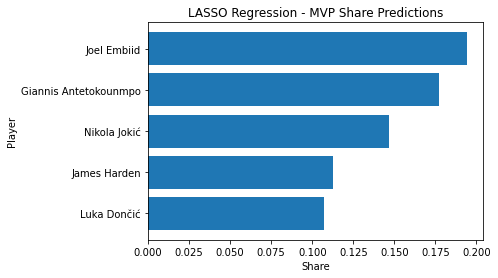

In [35]:
lasso_join_plot = lasso_join.sort_values(["predictions"],ascending=False)
plt.figure(1)
plt.barh(lasso_join_plot['Player'][0:5],lasso_join_plot['predictions'][0:5])
plt.gca().invert_yaxis()
plt.title("LASSO Regression - MVP Share Predictions")
plt.xlabel("Share")
plt.ylabel("Player")
plt.show()

In [36]:
print('alpha: %f' % lasso.alpha_) # optimum alpha value

alpha: 0.003554


In [37]:
lasso_join = lasso_join.sort_values("Share", ascending=False)
lasso_join["Rank"] = list(range(1,lasso_join.shape[0]+1))
lasso_join.head(10)

,Player,Share,predictions,Rank
730,Nikola Jokić,0.875,0.146428,1
904,Joel Embiid,0.706,0.194181,2
13036,Giannis Antetokounmpo,0.595,0.177405,3
974,Devin Booker,0.216,0.056188,4
12827,Luka Dončić,0.146,0.107239,5
1246,Jayson Tatum,0.043,0.077959,6
13648,Ja Morant,0.010,0.084792,7
6994,Stephen Curry,0.004,0.045426,8
972,Chris Paul,0.002,0.034633,9
8963,LeBron James,0.001,0.070934,10


In [38]:
lasso_join = join.sort_values("predictions", ascending=False)
lasso_join["Predicted_Rank"] = list(range(1,lasso_join.shape[0]+1))
lasso_join.head(10)

,Player,Share,predictions,Rank,Predicted_Rank
904,Joel Embiid,0.706,0.194181,2,1
13036,Giannis Antetokounmpo,0.595,0.177405,3,2
730,Nikola Jokić,0.875,0.146428,1,3
903,James Harden,0.000,0.112598,393,4
12827,Luka Dončić,0.146,0.107239,5,5
11358,Jimmy Butler,0.000,0.103403,51,6
6781,Kevin Durant,0.001,0.099054,12,7
13249,Rudy Gobert,0.000,0.096835,233,8
4223,DeMar DeRozan,0.001,0.087219,11,9
8998,Karl-Anthony Towns,0.000,0.086929,121,10


In [39]:
def find_ap(lasso_join):
    actual = lasso_join.sort_values("Share", ascending=False).head(5)
    predicted = lasso_join.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found+=1
            ps.append(found/seen)
        seen+=1
    return sum(ps)/len(ps)

In [40]:
find_ap(lasso_join)

0.797037037037037

In [41]:
rf = RandomForestRegressor(random_state = 2, n_estimators = 100) # random forest model
rf.fit(train[predictors],train["Share"]) # fitting training data to the random forest model

RandomForestRegressor(random_state=2)

In [42]:
rf_predictions = rf.predict(test[predictors])
rf_predictions = pd.DataFrame(rf_predictions, columns=["predictions"], index=test.index)

In [43]:
rf_join = pd.concat([test[["Player", "Share"]], rf_predictions], axis=1)

In [44]:
rf_join.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
730,Nikola Jokić,0.875,0.63517
904,Joel Embiid,0.706,0.51802
13036,Giannis Antetokounmpo,0.595,0.53636
974,Devin Booker,0.216,0.15896
12827,Luka Dončić,0.146,0.12396
1246,Jayson Tatum,0.043,0.03444
13648,Ja Morant,0.010,0.07124
6994,Stephen Curry,0.004,0.00276
972,Chris Paul,0.002,0.00290
8963,LeBron James,0.001,0.08567


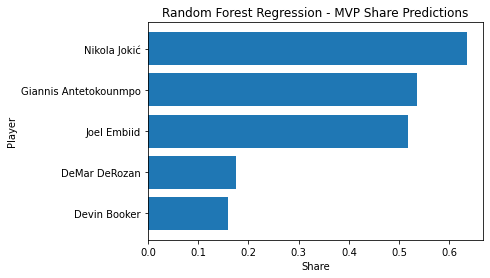

In [45]:
rf_join_plot = rf_join.sort_values(["predictions"],ascending=False)
plt.figure(1)
plt.barh(rf_join_plot['Player'][0:5],rf_join_plot['predictions'][0:5])
plt.gca().invert_yaxis()
plt.title("Random Forest Regression - MVP Share Predictions")
plt.xlabel("Share")
plt.ylabel("Player")
plt.show()

In [46]:
rf_join = rf_join.sort_values("Share", ascending=False)
rf_join["Rank"] = list(range(1,rf_join.shape[0]+1))
rf_join.head(10)

,Player,Share,predictions,Rank
730,Nikola Jokić,0.875,0.63517,1
904,Joel Embiid,0.706,0.51802,2
13036,Giannis Antetokounmpo,0.595,0.53636,3
974,Devin Booker,0.216,0.15896,4
12827,Luka Dončić,0.146,0.12396,5
1246,Jayson Tatum,0.043,0.03444,6
13648,Ja Morant,0.010,0.07124,7
6994,Stephen Curry,0.004,0.00276,8
972,Chris Paul,0.002,0.00290,9
8963,LeBron James,0.001,0.08567,10


In [47]:
rf_join = rf_join.sort_values("predictions", ascending=False)
rf_join["Predicted_Rank"] = list(range(1,rf_join.shape[0]+1))
rf_join.head(10)

,Player,Share,predictions,Rank,Predicted_Rank
730,Nikola Jokić,0.875,0.63517,1,1
13036,Giannis Antetokounmpo,0.595,0.53636,3,2
904,Joel Embiid,0.706,0.51802,2,3
4223,DeMar DeRozan,0.001,0.17517,11,4
974,Devin Booker,0.216,0.15896,4,5
13249,Rudy Gobert,0.000,0.15412,233,6
12827,Luka Dončić,0.146,0.12396,5,7
8963,LeBron James,0.001,0.08567,10,8
6781,Kevin Durant,0.001,0.07822,12,9
8953,Anthony Davis,0.000,0.07731,112,10


In [48]:
def find_ap(rf_join):
    actual = rf_join.sort_values("Share", ascending=False).head(5)
    predicted = rf_join.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found+=1
            ps.append(found/seen)
        seen+=1
    return sum(ps)/len(ps)

In [49]:
find_ap(rf_join)

0.9028571428571428

In [129]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 20, weights = 'uniform') # knn model
knn.fit(train[predictors],train["Share"]) # fitting training data to the knn model

KNeighborsRegressor(n_neighbors=20)

In [130]:
knn_predictions = knn.predict(test[predictors])
knn_predictions = pd.DataFrame(knn_predictions, columns=["predictions"], index=test.index)

In [131]:
knn_join = pd.concat([test[["Player", "Share"]], knn_predictions], axis=1)

In [132]:
knn_join.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
730,Nikola Jokić,0.875,0.23225
904,Joel Embiid,0.706,0.18545
13036,Giannis Antetokounmpo,0.595,0.24820
974,Devin Booker,0.216,0.01325
12827,Luka Dončić,0.146,0.07070
1246,Jayson Tatum,0.043,0.00770
13648,Ja Morant,0.010,0.06900
6994,Stephen Curry,0.004,0.06870
972,Chris Paul,0.002,0.00820
8963,LeBron James,0.001,0.14640


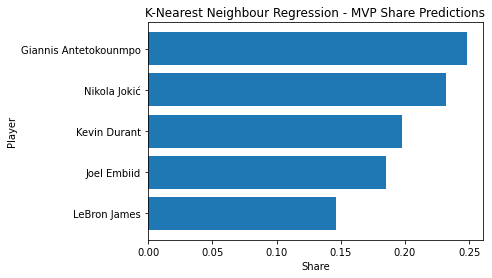

In [142]:
knn_join_plot = knn_join.sort_values(["predictions"],ascending=False)
plt.figure(1)
plt.barh(knn_join_plot['Player'][0:5],knn_join_plot['predictions'][0:5])
plt.gca().invert_yaxis()
plt.title("K-Nearest Neighbour Regression - MVP Share Predictions")
plt.xlabel("Share")
plt.ylabel("Player")
plt.show()

In [134]:
knn_join = knn_join.sort_values("Share", ascending=False)
knn_join["Rank"] = list(range(1,rf_join.shape[0]+1))
knn_join.head(10)

,Player,Share,predictions,Rank
730,Nikola Jokić,0.875,0.23225,1
904,Joel Embiid,0.706,0.18545,2
13036,Giannis Antetokounmpo,0.595,0.24820,3
974,Devin Booker,0.216,0.01325,4
12827,Luka Dončić,0.146,0.07070,5
1246,Jayson Tatum,0.043,0.00770,6
13648,Ja Morant,0.010,0.06900,7
6994,Stephen Curry,0.004,0.06870,8
972,Chris Paul,0.002,0.00820,9
8963,LeBron James,0.001,0.14640,10


In [135]:
knn_join = knn_join.sort_values("predictions", ascending=False)
knn_join["Predicted_Rank"] = list(range(1,rf_join.shape[0]+1))
knn_join.head(10)

,Player,Share,predictions,Rank,Predicted_Rank
13036,Giannis Antetokounmpo,0.595,0.24820,3,1
730,Nikola Jokić,0.875,0.23225,1,2
6781,Kevin Durant,0.001,0.19755,12,3
904,Joel Embiid,0.706,0.18545,2,4
8963,LeBron James,0.001,0.14640,10,5
4223,DeMar DeRozan,0.001,0.09555,11,6
903,James Harden,0.000,0.07750,393,7
12827,Luka Dončić,0.146,0.07070,5,8
13648,Ja Morant,0.010,0.06900,7,9
6994,Stephen Curry,0.004,0.06870,8,10


In [136]:
def find_ap(knn_join):
    actual = knn_join.sort_values("Share", ascending=False).head(5)
    predicted = knn_join.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found+=1
            ps.append(found/seen)
        seen+=1
    return sum(ps)/len(ps)

In [137]:
find_ap(knn_join)

0.7125

In [59]:
ann = MLPRegressor(activation='identity', solver='lbfgs', hidden_layer_sizes=100, max_iter=1000, random_state=10, learning_rate ='invscaling') # MLP model
ann.fit(train[predictors],train["Share"]) # fitting training data to the knn model

MLPRegressor(activation='identity', hidden_layer_sizes=100,
             learning_rate='invscaling', max_iter=1000, random_state=10,
             solver='lbfgs')

In [60]:
ann_predictions = ann.predict(test[predictors])
ann_predictions = pd.DataFrame(ann_predictions, columns=["predictions"], index=test.index)

In [61]:
ann_join = pd.concat([test[["Player", "Share"]], ann_predictions], axis=1)

In [62]:
ann_join.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
730,Nikola Jokić,0.875,0.163463
904,Joel Embiid,0.706,0.082274
13036,Giannis Antetokounmpo,0.595,0.125589
974,Devin Booker,0.216,0.067632
12827,Luka Dončić,0.146,0.070928
1246,Jayson Tatum,0.043,0.103442
13648,Ja Morant,0.010,0.159400
6994,Stephen Curry,0.004,-0.038803
972,Chris Paul,0.002,-0.109013
8963,LeBron James,0.001,0.096145


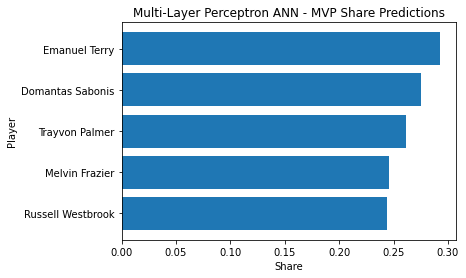

In [63]:
ann_join_plot = ann_join.sort_values(["predictions"],ascending=False)
plt.figure(1)
plt.barh(ann_join_plot['Player'][0:5],ann_join_plot['predictions'][0:5])
plt.gca().invert_yaxis()
plt.title("Multi-Layer Perceptron ANN - MVP Share Predictions")
plt.xlabel("Share")
plt.ylabel("Player")
plt.show()

In [64]:
ann_join = ann_join.sort_values("Share", ascending=False)
ann_join["Rank"] = list(range(1,ann_join.shape[0]+1))
ann_join.head(10)

,Player,Share,predictions,Rank
730,Nikola Jokić,0.875,0.163463,1
904,Joel Embiid,0.706,0.082274,2
13036,Giannis Antetokounmpo,0.595,0.125589,3
974,Devin Booker,0.216,0.067632,4
12827,Luka Dončić,0.146,0.070928,5
1246,Jayson Tatum,0.043,0.103442,6
13648,Ja Morant,0.010,0.159400,7
6994,Stephen Curry,0.004,-0.038803,8
972,Chris Paul,0.002,-0.109013,9
8963,LeBron James,0.001,0.096145,10


In [65]:
ann_join = ann_join.sort_values("predictions", ascending=False)
ann_join["Predicted_Rk"] = list(range(1,ann_join.shape[0]+1))
ann_join.head(10)

,Player,Share,predictions,Rank,Predicted_Rk
976,Emanuel Terry,0.000,0.293129,441,1
1923,Domantas Sabonis,0.000,0.274942,344,2
13934,Trayvon Palmer,0.000,0.261287,605,3
1272,Melvin Frazier,0.000,0.246007,326,4
8967,Russell Westbrook,0.000,0.244398,89,5
8507,Jusuf Nurkić,0.000,0.237331,107,6
4223,DeMar DeRozan,0.001,0.225479,11,7
13702,Collin Sexton,0.000,0.211108,169,8
4792,Jonas Valančiūnas,0.000,0.202649,580,9
973,Deandre Ayton,0.000,0.200594,446,10


In [66]:
def find_ap(ann_join):
    actual = ann_join.sort_values("Share", ascending=False).head(5)
    predicted = ann_join.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found+=1
            ps.append(found/seen)
        seen+=1
    return sum(ps)/len(ps)

In [67]:
find_ap(ann_join)

0.040421497669407155

In [68]:
years = list(range(1986,2023))

In [69]:
aps = []
all_predictions = []
for year in years[5:]:
    train = all_stats[all_stats["Year"] <year] # any rows where the year less than chosen year are training data
    test = all_stats[all_stats["Year"] == year] # rows where row equals selected year is tested data
    model.fit(train[predictors], train["Share"])
    predictions = model.predict(test[predictors]) # make prediction based on our model
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index) # make predictions into a data frame
    join = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    all_predictions.append(join)
    aps.append(find_ap(join))

In [70]:
sum(aps) / len(aps)

0.7660018861125721

In [71]:
def add_ranks(join):
    join = join.sort_values("Share", ascending=False) #sorting data frame by actual share
    join["Rank"] = list(range(1,join.shape[0]+1)) # adding in rank
    join = join.sort_values("predictions",ascending=False) # sorting data frame by predicted share
    join["Predicted_Rank"] = list(range(1,join.shape[0]+1)) # adding in predicted rank
    join["Diff"] = join["Rank"] - join["Predicted_Rank"] # tells us differenence between actual rank and predicted rank
    return join

In [72]:
ranking = add_ranks(all_predictions[1])
ranking[ranking["Rank"] < 6].sort_values("Diff", ascending=False)

,Player,Share,predictions,Rank,Predicted_Rank,Diff
9882,David Robinson,0.351,0.174773,3,1,2
12570,Karl Malone,0.273,0.146253,4,3,1
11247,Michael Jordan,0.938,0.170694,1,2,-1
3367,Clyde Drexler,0.584,0.141820,2,4,-2
9364,Patrick Ewing,0.104,0.108273,5,10,-5


In [73]:
def backtest(stats, model, year, predictors):
    aps = []
    all_predictions = []
    for year in years[5:]:
        train = all_stats[all_stats["Year"] <year]
        test = all_stats[all_stats["Year"] == year]
        model.fit(train[predictors], train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        join = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        join = add_ranks(join)
        all_predictions.append(join)
        aps.append(find_ap(join))
    return sum(aps)/len(aps), aps, pd.concat(all_predictions)

In [78]:
mean_ap, aps, all_predictions = backtest(all_stats, model, years[28:], predictors)

In [79]:
mean_ap

0.7660018861125721

In [80]:
rf = RandomForestRegressor(n_estimators=100, random_state=3, min_samples_split=5)

mean_ap, aps, all_predictions = backtest(all_stats, rf, years[28:], predictors)

In [81]:
mean_ap

0.7422677585931207

In [138]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 20, weights = 'uniform')
mean_ap, aps, all_predictions = backtest(all_stats, knn, years[28:], predictors)

In [139]:
mean_ap

0.6757014572025691

In [140]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
lasso = LassoCV(cv=cv, n_jobs=-1)
mean_ap, aps, all_predictions = backtest(all_stats, lasso, years[28:], predictors)

C:\Users\stnya\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015473616809140722, tolerance: 0.0006297137594890525
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\stnya\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001433329537254835, tolerance: 0.0006164888846715312
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\stnya\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036536528512938204, tolerance: 0.0006297137594890525
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\stnya\Anaconda3\lib\site-packages\sklearn\linear_model\_coordi

In [141]:
mean_ap

0.7647817843696408

In [145]:
ann = MLPRegressor(activation='identity', solver='lbfgs', hidden_layer_sizes=100, max_iter=10000, random_state=10, learning_rate ='invscaling')
mean_ap, aps, all_predictions = backtest(all_stats, ann, years[28:], predictors)

In [146]:
mean_ap

0.20880262346975503